# Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth" : 1.0, "axes.labelsize" : 12, "axes.titlesize" : 14})

# Critical Temperature configuration

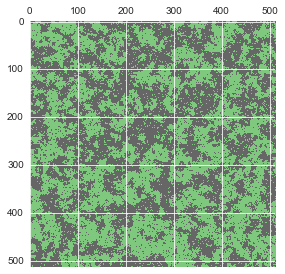

In [40]:
plt.figure(figsize=(50,50))
check = np.loadtxt("check.txt")
plt.matshow(check, aspect="auto", cmap=plt.cm.Accent)
plt.savefig("report/graficas/config512.eps")
plt.show()

# Quantities Graphs

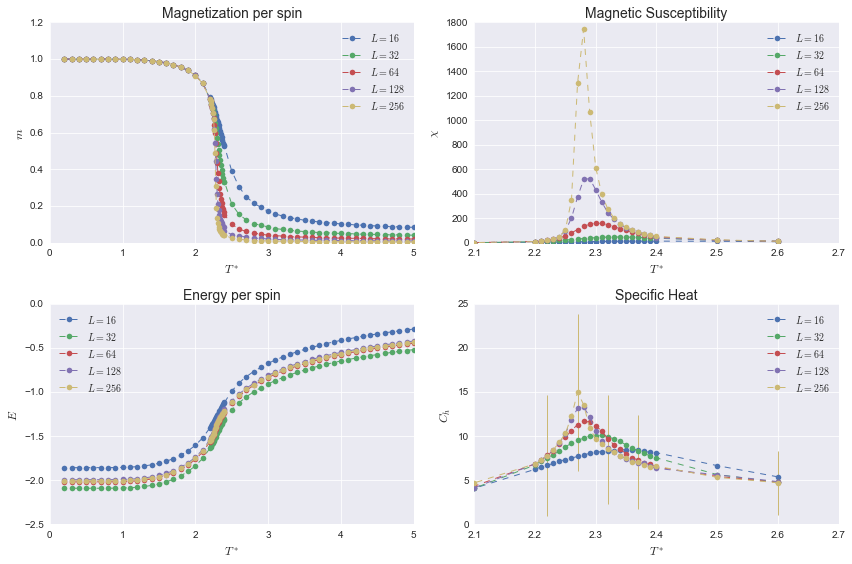

In [6]:
sizes = [16, 32, 64, 128, 256]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]


plt.figure(figsize=(12,8))


plt.subplot(221)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,2], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$m$")
plt.title("Magnetization per spin")

plt.subplot(222)

a = 24
b = 48
step = 5

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,4]* zoom[k], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[a:b:step,0], data[a:b:step,4]* zoom[k], yerr=data[a:b:step,5]* zoom[k], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$\chi$")
plt.title("Magnetic Susceptibility")

plt.subplot(223)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,6], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[:,0], data[:,6], yerr=data[:,7], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper left")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$E$")
plt.title("Energy per spin")


plt.subplot(224)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,8] * zoom[k], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[a:b:step,0], data[a:b:step,8] * zoom[k], yerr=data[a:b:step,9]*zoom[k], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$C_h$")
plt.title("Specific Heat")

plt.tight_layout()
plt.savefig("observ.eps")
plt.show()

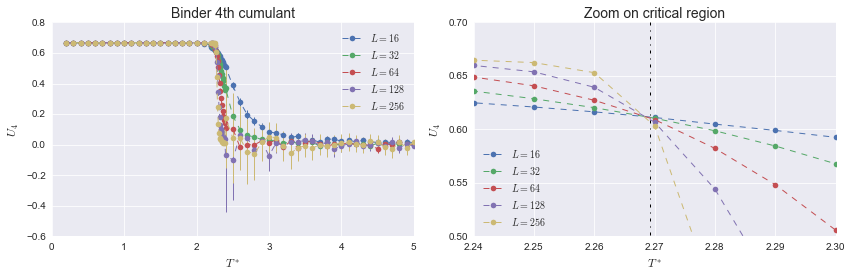

In [3]:
sizes = [16, 32, 64, 128, 256]
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]

plt.figure(figsize=(12,4))

plt.subplot(121)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,10], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[:,0], data[:,10], yerr=data[:,11], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$U_4$")
plt.title("Binder 4th cumulant")


plt.subplot(122)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,10], ls="--", marker="o", label = labels[k], color = c)
    #plt.errorbar(data[:,0], data[:,10], yerr=data[:,11], fmt="none", ecolor = c)
    k += 1
plt.plot((2.269185314, 2.269185314), (0.4,0.8), ls="-.", color="black")
plt.xlim((2.24,2.3))
plt.ylim((0.5,0.7))
plt.legend(loc="lower left")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$U_4$")
plt.title("Zoom on critical region")

plt.tight_layout()
plt.savefig("report/graficas/binder.eps")
plt.show()

# Data Analysis
## Critical Temperature

In [2]:
#Get the data
sizes = [16, 32, 64, 128, 256]
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]


#To store some linear interpolations between data
m = np.empty(len(sizes))
n = np.empty(len(sizes))
cortes = np.empty(10)

#Points 2.26 and 2.27 in x 
a = 40
b = 39

#Y axis
x = 0
y = 10

#Create interpolation lines
k = 0
for data in dataset:
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]    
    k += 1

#Compute points where they cross
i=0
for j in xrange(len(sizes)):
    for k in xrange(j+1, len(sizes)):
        cortes[i] = (n[k] - n[j]) / (m[j] - m[k])
        i += 1

print(np.mean(cortes), np.std(cortes)) #Get the final result


(2.2682932444826074, 0.00016789201070581682)


Critical temperature is $T_c = 2.2682 \pm 0.00016$

(array([ 0.12423633,  1.21705039]), array([ 0.00252586,  0.01371908]))
(array([-1.69531943,  0.45150262]), array([ 0.00152975,  0.0026265 ]))
(array([-0.2813402 ,  2.94323332]), array([ 0.00556244,  0.06559899]))


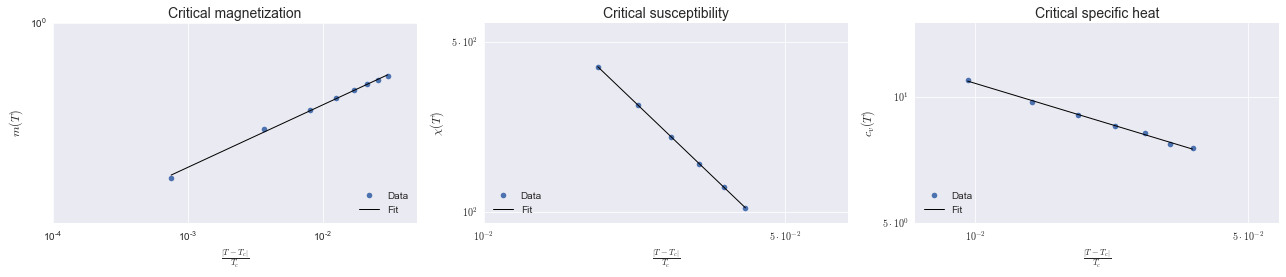

In [89]:
#Get the data
sizes = [16, 32, 64, 128, 256]
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]

zoom = [1, 256*256]
tc = 2.2682932444826074

plt.figure(figsize=(18,4))


n = 2


#Points 2.26 and 2.27 in x 
a = 39
b = 47

plt.subplot(131)


x = np.abs(dataset[4][a:b,0] - np.ones(8) * tc) / tc
ydata = dataset[4][a:b,n] * zoom[0]
popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata)
perr = np.sqrt(np.diag(pcov)) #And compute its errors
plt.plot(x, ydata, marker = "o", ls="none", label = "Data")
print(popt, perr)
y = popt[1]*np.power(x, popt[0])
plt.plot(x,y,color="black", label="Fit")
plt.legend(loc="lower right")
plt.title("Critical magnetization")
plt.xlabel(r"$\frac{\left | T - T_c \right |}{T_c}$")
plt.ylabel(r"$m(T)$")
plt.xlim((0.0001,0.05))
plt.ylim((0.4,1.0))

plt.yscale('log')
plt.xscale('log')


plt.subplot(132)

n = 4

#Points 2.26 and 2.27 in x 
a = 30
b = 36

x = np.abs(dataset[4][a:b,0] - np.ones(6) * tc) / tc
ydata = dataset[4][a:b,n] * zoom[1]
popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata)
perr = np.sqrt(np.diag(pcov)) #And compute its errors
plt.plot(x, ydata, marker = "o", ls="none", label = "Data")
print(popt, perr)
y = popt[1]*np.power(x, popt[0])
plt.plot(x,y,color="black", label="Fit")
plt.yscale('log')
plt.xscale('log')

plt.legend(loc="lower left")
plt.title("Critical susceptibility")
plt.xlabel(r"$\frac{\left | T - T_c \right |}{T_c}$")
plt.ylabel(r"$\chi(T)$")
plt.xlim((0.01,0.07))
plt.ylim((90,600))
plt.xticks((0.01, 0.05), (r"$10^{-2}$", r"$5\cdot10^{-2}$"))
plt.yticks((100, 500), (r"$10^2$", r"$5\cdot10^2$"))

plt.subplot(133)


n = 8

#Points 2.26 and 2.27 in x 
a = 31
b = 38

x = np.abs(dataset[4][a:b,0] - np.ones(7) * tc) / tc
ydata = dataset[4][a:b,n] * zoom[1]
popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata)
perr = np.sqrt(np.diag(pcov)) #And compute its errors
plt.plot(x, ydata, marker = "o", ls="none", label = "Data")
print(popt, perr)
y = popt[1]*np.power(x, popt[0])
plt.plot(x,y,color="black", label="Fit")
plt.yscale('log')
plt.xscale('log')

plt.legend(loc="lower left")
plt.title("Critical specific heat")
plt.xlabel(r"$\frac{\left | T - T_c \right |}{T_c}$")
plt.ylabel(r"$c_v (T)$")
plt.xlim((0.007,0.06))
plt.ylim((5,15))
plt.xticks((0.01, 0.05), (r"$10^{-2}$", r"$5\cdot10^{-2}$"))
plt.yticks((5, 10), (r"$5\cdot 10^0$", r"$10^1$"))

plt.tight_layout()
plt.savefig("exponentes_directo.eps")
plt.show()
plt.close()



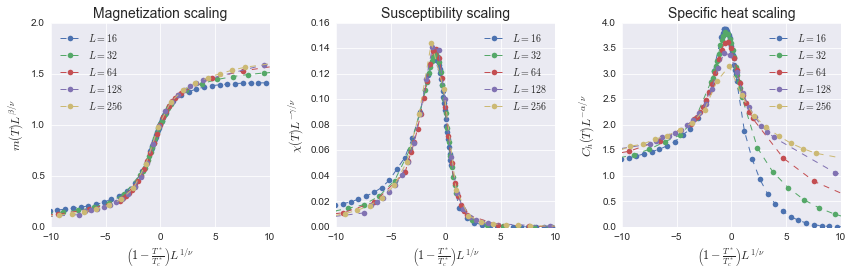

In [96]:
#Get the data
sizes = [16, 32, 64, 128, 256]
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]
zoom = np.power(sizes,2.0)

labels = [ r"$L = {0}$".format(k) for k in sizes]

#Critical exponents as computed below

#beta = 0.12061497738075458
nu = 1.0
#alfa = 0.21943891657135919
#gamma = 1.7291382697785589
beta = 0.12423633
alfa = 0.2813402
gamma = 1.69531943
tc = 2.2682932444826074

xlimshow = 10 #Portion of the space to show

plt.figure(figsize=(12,4))

plt.subplot(131)

palette = sns.color_palette() #To get colors
k = 0

for data in dataset:
    c = palette.pop(0)
    x = (np.ones(np.size(data[:,0])) - data[:,0]/tc) * sizes[k]**(1.0/nu) #Get x as (1-tc/t)L^(1/v)
    y = sizes[k]**(beta / nu) * data[:,2] #Get y as L^(b/v)
    plt.plot(x, y, ls="--", marker="o", label = labels[k], color = c) #Plot it
    k += 1 #Next plot
plt.legend(loc="upper left")
plt.xlabel(r"$\left ( 1-\frac{T^*}{T_c ^*} \right ) L^{1/\nu}$")
plt.ylabel(r"$m(T)L^{\beta / \nu}$")
plt.xlim((-xlimshow,xlimshow))
plt.title("Magnetization scaling")

#Do the same for every function
plt.subplot(132)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    x = (np.ones(np.size(data[:,0])) - data[:,0]/tc) * sizes[k]**(1.0/nu)
    y = sizes[k]**(-gamma / nu) * data[:,4] * zoom[k] #Dont forget to zoom it
    plt.plot(x, y, ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$\left ( 1-\frac{T^*}{T_c ^*} \right ) L^{1/\nu}$")
plt.ylabel(r"$\chi(T)L^{- \gamma / \nu}$")
plt.xlim((-xlimshow,xlimshow))
plt.title("Susceptibility scaling")
plt.xlabel(r"$\left ( 1-\frac{T^*}{T_c ^*} \right ) L^{1/\nu}$")


plt.subplot(133)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    x = (np.ones(np.size(data[:,0])) - data[:,0]/tc) * sizes[k]**(1.0/nu)
    y = sizes[k]**(-alfa / nu) * data[:,8] * zoom[k]
    plt.plot(x, y, ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$\left ( 1-\frac{T^*}{T_c ^*} \right ) L^{1/\nu}$")
plt.ylabel(r"$C_h(T)L^{- \alpha / \nu}$")
plt.xlim((-xlimshow,xlimshow))
plt.title("Specific heat scaling")

plt.tight_layout()
plt.savefig("report/graficas/scaling_directo.eps")
plt.show()


(-0.12061497738075458, 0.00036988723149128562)
(1.7291382697785589, 0.00097265649275674298)
(0.21943891657135919, 0.014764391131313379)


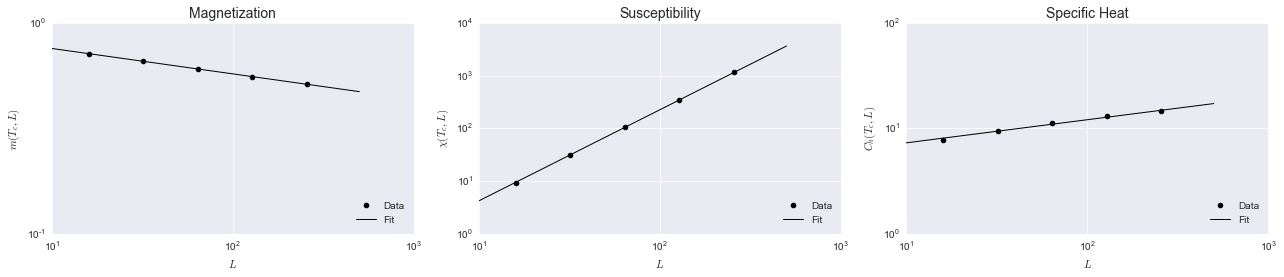

In [37]:
#Get the data
sizes = [16, 32, 64, 128, 256]
zoom = np.power(sizes, 2.0)
dataset = [np.loadtxt("final/graficas/test_alt" + str(k) + ".txt") for k in sizes]

alfa = 0.0
t = np.linspace(10,500,100)
var = np.power(t, 7.0/4.0)


#To store some linear interpolations between data
m = np.empty(len(sizes))
n = np.empty(len(sizes))
cortes = np.empty((len(sizes),3))

#Points 2.6 and 2.7 in x 
a = 40
b = 39

tc = 2.2682932444826074 #Critical T

#Magnetization
x = 0
y = 2

#Create interpolation lines
k = 0
for data in dataset:
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x]) #Get slope,
    n[k] = data[a, y] - m[k] * data[a, x]    #Independent term
    cortes[k,0] = m[k] * tc + n[k] #At critical t
    k += 1


    
#Chi
x = 0
y = 4
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k] #Make the appropiate scale - not per spin
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,1] = m[k] * tc + n[k]
    k += 1
    
#Specific heat
x = 0
y = 8
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k]
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,2] = m[k] * tc + n[k]
    k += 1

titles = ["Magnetization", "Susceptibility", "Specific Heat"]
ylabels =[r"$m(T_c, L)$", r"$\chi(T_c, L)$", r"$C_h (T_c, L)$"]

plt.figure(figsize=(18,4))
for k in xrange(3):
    plt.subplot(1,3,k+1) #Create a subplot
    #MAke the fit
    popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), sizes, np.abs(cortes[:,k]))
    perr = np.sqrt(np.diag(pcov)) #And compute its errors
    print(popt[0], perr[0]) #Show the values
    #Plot the data and also the fit
    plt.plot(sizes, np.abs(cortes[:,k]), ls="none", marker = "o", label="Data", color="black")
    plt.plot(t, np.power(t, popt[0])*popt[1],  label="Fit", color="black")
    #Legend, title and so on
    plt.legend(loc="lower right")
    plt.title(titles[k])
    plt.xlabel(r"$L$")
    plt.ylabel(ylabels[k])
    plt.yscale('log')
    plt.xscale('log')
plt.tight_layout()
plt.savefig("criticexp.eps")
plt.show()


### Values of the critical exponents:
$\beta = -0.1206 \pm 0.0004$,  
$\gamma = 1.7291 \pm 0.0010$,  
$\alpha = 0.219 \pm 0.015$. 
